In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
df=pd.read_csv('GWB1223.csv')
data = df[(df['Latitude'] == 22.5) & (df['Longitude'] == 87.5)]
data = data.drop(columns=['Latitude', 'Longitude', 'Rain', 'Tmax'])
#data.set_index('Date', inplace=True)
#data = data.asfreq('D')
#print(data.index.freq)
print(data.head())

             Date   Tmin
26298  2012-01-01  17.80
26299  2012-01-02  17.54
26300  2012-01-03  17.23
26301  2012-01-04  16.98
26302  2012-01-05  16.93


In [11]:
data['Date']=pd.to_datetime(data['Date'])
print(data.head())

            Date   Tmin
26298 2012-01-01  17.80
26299 2012-01-02  17.54
26300 2012-01-03  17.23
26301 2012-01-04  16.98
26302 2012-01-05  16.93


In [12]:
train = data.iloc[:-365]
test = data.iloc[-365:]

In [67]:
df1 = train.set_index('Date')
df2 = data.set_index('Date')
df3 = test.set_index('Date')

monthly_Tmin = df1.resample('ME').mean()
all_monthly_Tmin = df2.resample('ME').mean()
test_plot = df3.resample('ME').mean()
all_monthly_Tmin.head()

,Tmax
Date,
1990-01-31,28.430968
1990-02-28,29.864286
1990-03-31,30.601935
1990-04-30,34.915333
1990-05-31,34.576774


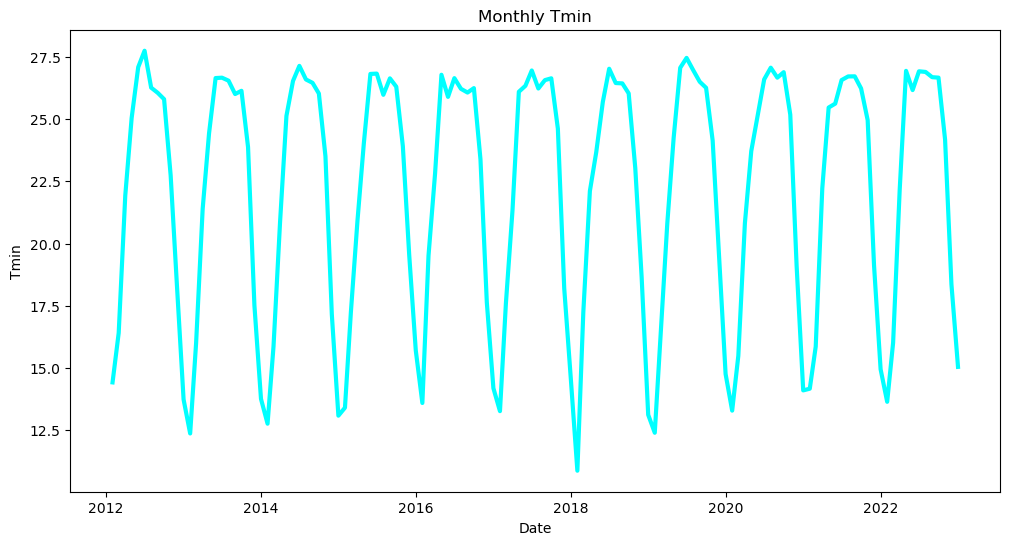

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_Tmin['Tmin'], linewidth=3,c='cyan')
plt.title("Monthly Tmin")
plt.xlabel("Date")
plt.ylabel("Tmin")
plt.show()

In [15]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_Tmin['Tmin'])

ADF Statistic: -2.079136833628342
p-value: 0.25298610755129247
Non-Stationary


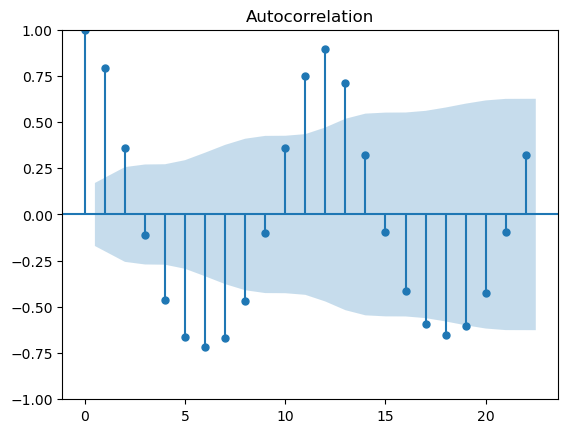

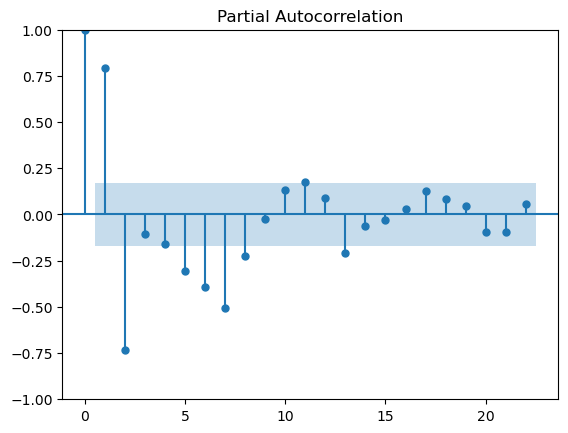

In [16]:
plot_acf(monthly_Tmin)
plot_pacf(monthly_Tmin)
plt.show()

In [17]:
# Define SARIMA parameters
p, d, q = 0, 1, 1
P, D, Q, s = 1, 1, 1, 72 # Assuming 6 month seasonality

# Fit the SARIMA model
model = SARIMAX(monthly_Tmin, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/home/arpan/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78090D-01    |proj g|=  1.00057D-01

At iterate    5    f=  6.61552D-01    |proj g|=  3.28363D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   1.481D-06   6.614D-01
  F =  0.66138644793368384     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


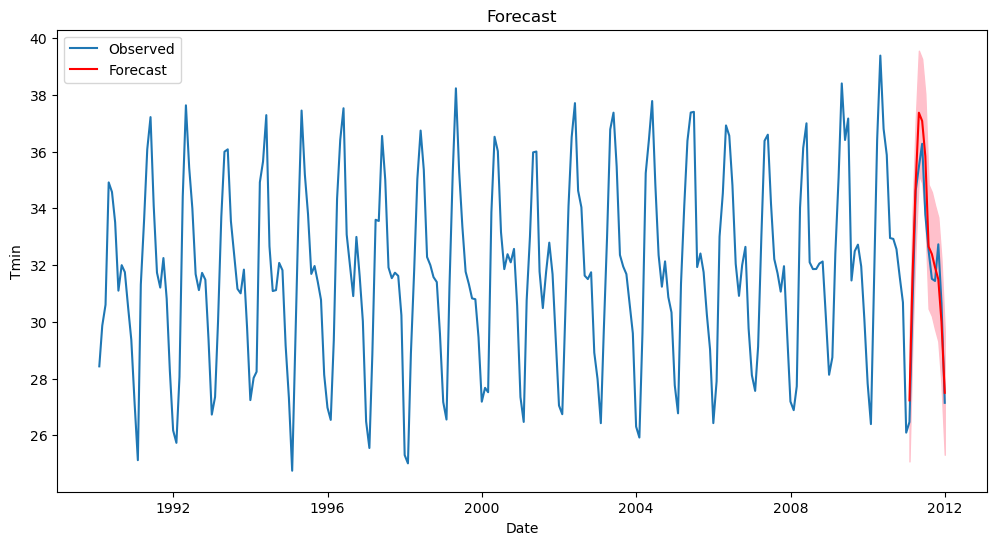

In [69]:
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(all_monthly_Tmin, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Forecast")
plt.xlabel("Date")
plt.ylabel("Tmin")
plt.legend()
plt.show()

In [19]:
df=pd.read_csv('GWB1223.csv')
data = df[(df['Latitude'] == 22.5) & (df['Longitude'] == 87.5)]
data = data.drop(columns=['Latitude', 'Longitude', 'Tmin', 'Tmax'])
#data.set_index('Date', inplace=True)
#data = data.asfreq('D')
#print(data.index.freq)
data['Date']=pd.to_datetime(data['Date'])
print(data.head())

            Date    Rain
26298 2012-01-01  0.0000
26299 2012-01-02  0.9735
26300 2012-01-03  0.2212
26301 2012-01-04  4.5595
26302 2012-01-05  0.0000


In [20]:
train = data.iloc[:-365]
test = data.iloc[-365:]

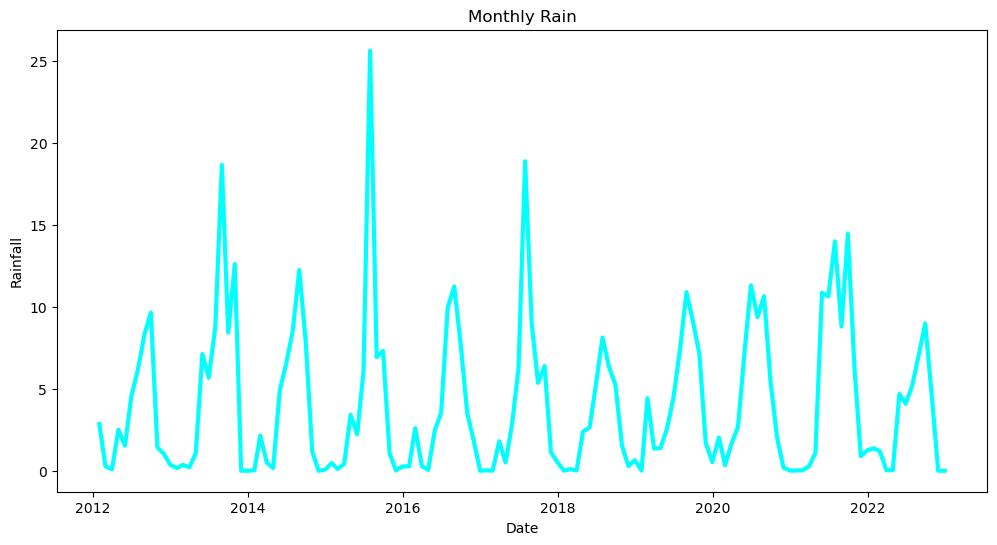

In [21]:
df1 = train.set_index('Date')
df2 = data.set_index('Date')
df3 = test.set_index('Date')

monthly_Tmin = df1.resample('ME').mean()
all_monthly_Tmin = df2.resample('ME').mean()
test_plot = df3.resample('ME').mean()
monthly_Tmin.head()
plt.figure(figsize=(12, 6))
plt.plot(monthly_Tmin['Rain'], linewidth=3,c='cyan')
plt.title("Monthly Rain")
plt.xlabel("Date")
plt.ylabel("Rainfall")
plt.show()

In [22]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_Tmin['Rain'])

ADF Statistic: -2.821861753648761
p-value: 0.05521819086381634
Non-Stationary


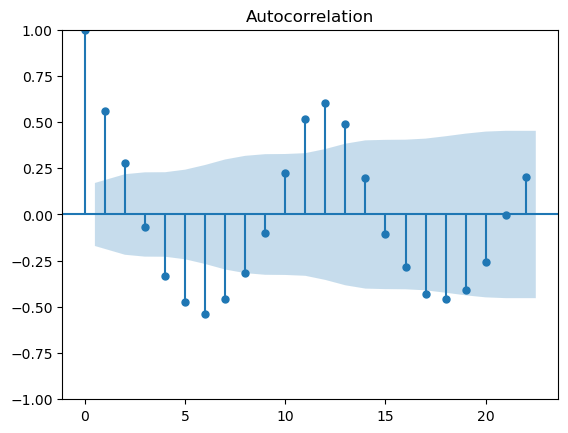

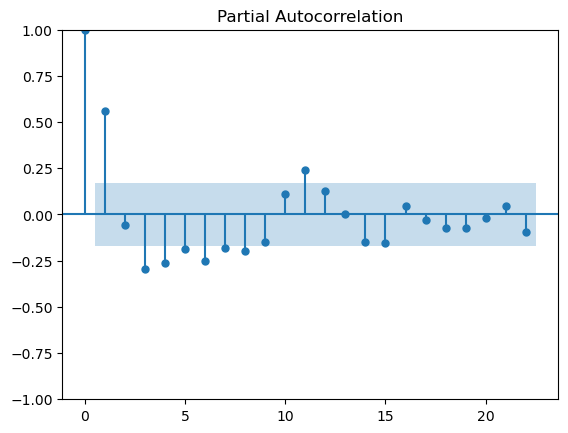

In [23]:
plot_acf(monthly_Tmin)
plot_pacf(monthly_Tmin)
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57630D+00    |proj g|=  1.79132D-01

At iterate    5    f=  1.40041D+00    |proj g|=  2.76982D-02

At iterate   10    f=  1.37235D+00    |proj g|=  2.40271D-02

At iterate   15    f=  1.37040D+00    |proj g|=  6.56343D-03


 This problem is unconstrained.



At iterate   20    f=  1.37029D+00    |proj g|=  2.56805D-03

At iterate   25    f=  1.37028D+00    |proj g|=  5.33581D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     39      1     0     0   5.337D-04   1.370D+00
  F =   1.3702753452566694     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


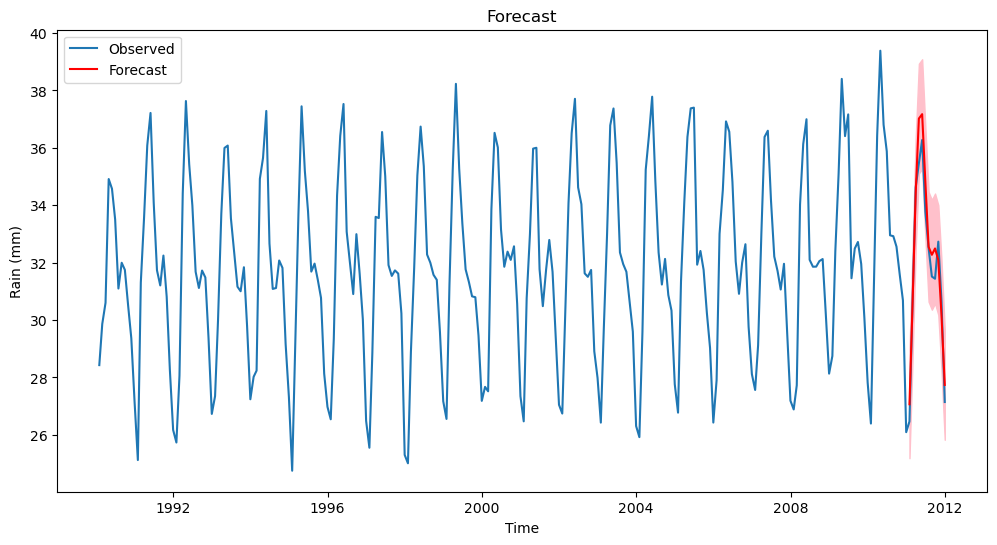

In [79]:
# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12 # Assuming 6 month seasonality

# Fit the SARIMA model
model = SARIMAX(monthly_Tmin, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
#model
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(all_monthly_Tmin, label='Observed') # all_monthly_Tmin test_plot
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Forecast")
plt.xlabel("Time")
plt.ylabel("Rain (mm)")
plt.legend()
plt.show()

In [25]:
df=pd.read_csv('All_INDIA_30.csv')
print(df.head())
data = df[(df['Latitude'] == 22.0) & (df['Longitude'] == 87.0)]
data = data.drop(columns=['Latitude', 'Longitude', 'rain', 'Tmin'])
#data.set_index('Date', inplace=True)
#data = data.asfreq('D')
#print(data.index.freq)
print(data.head())

         Date  Latitude  Longitude   Tmin   Tmax   rain
0  1990-01-01       9.0       74.0  24.06  32.33 -999.0
1  1990-01-02       9.0       74.0  24.45  32.39 -999.0
2  1990-01-03       9.0       74.0  23.87  32.39 -999.0
3  1990-01-04       9.0       74.0  23.43  32.58 -999.0
4  1990-01-05       9.0       74.0  22.66  32.65 -999.0
               Date   Tmax
1060097  1990-01-01  26.09
1060098  1990-01-02  25.47
1060099  1990-01-03  25.33
1060100  1990-01-04  24.91
1060101  1990-01-05  25.62


In [26]:
#data=data[['Date','Tmax']]
#data=pd.DataFrame(data)
data['Date']=pd.to_datetime(data['Date'])
print(data.head())

              Date   Tmax
1060097 1990-01-01  26.09
1060098 1990-01-02  25.47
1060099 1990-01-03  25.33
1060100 1990-01-04  24.91
1060101 1990-01-05  25.62


In [27]:
train = data.iloc[:-365]
test = data.iloc[-365:]

In [28]:
df1 = train.set_index('Date')
df2 = data.set_index('Date')
df3 = test.set_index('Date')

monthly_Tmax = df1.resample('ME').mean()
all_monthly_Tmax = df2.resample('ME').mean()
test_plot = df3.resample('ME').mean()
monthly_Tmax.head()

,Tmax
Date,
1990-01-31,28.430968
1990-02-28,29.864286
1990-03-31,30.601935
1990-04-30,34.915333
1990-05-31,34.576774


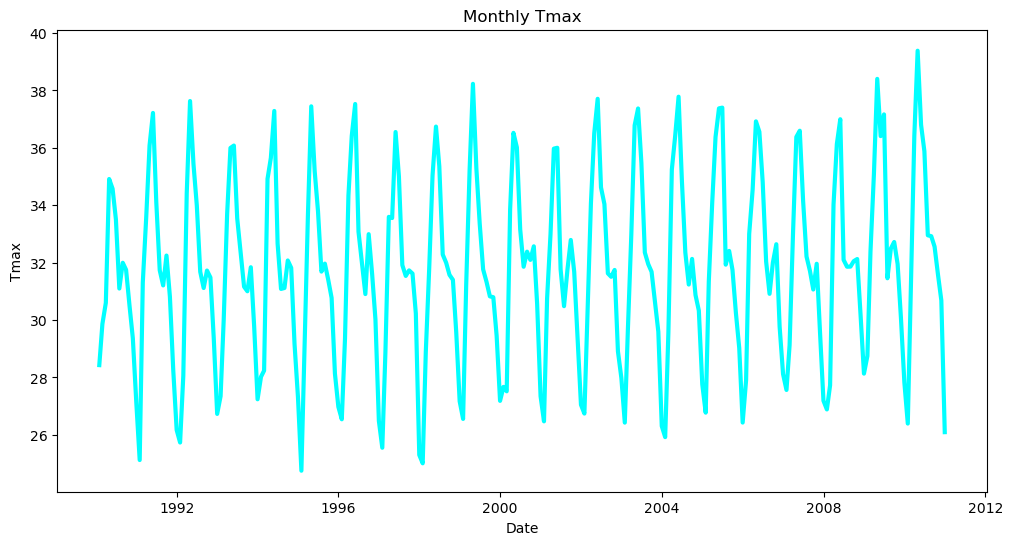

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_Tmax['Tmax'], linewidth=3,c='cyan')
plt.title("Monthly Tmax")
plt.xlabel("Date")
plt.ylabel("Tmax")
plt.show()

In [30]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_Tmax['Tmax'])

ADF Statistic: -2.253938879197174
p-value: 0.18725397249447084
Non-Stationary


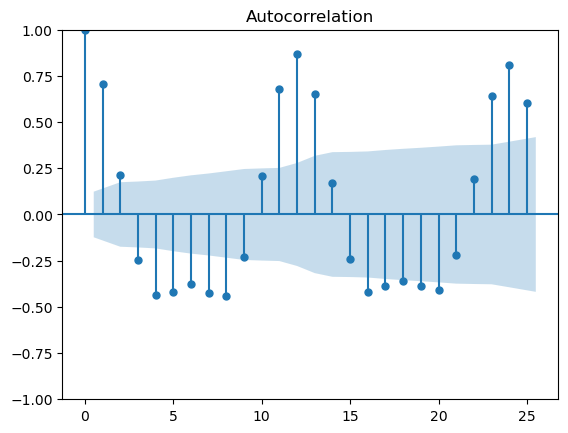

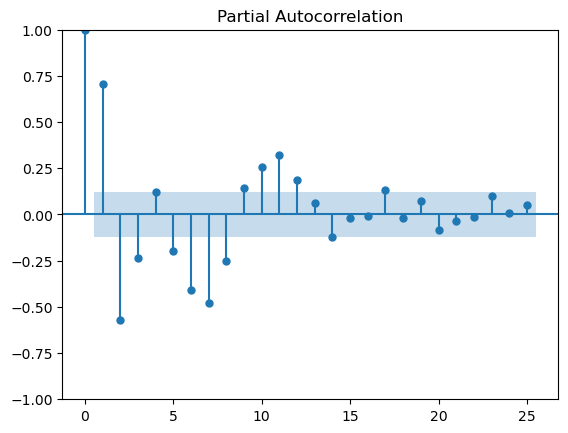

In [31]:
plot_acf(monthly_Tmax)
plot_pacf(monthly_Tmax)
plt.show()

In [32]:
# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 72 # Assuming 6 month seasonality

# Fit the SARIMA model
model = SARIMAX(monthly_Tmax, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/home/arpan/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23102D+00    |proj g|=  1.63994D-01

At iterate    5    f=  1.14957D+00    |proj g|=  7.46832D-02

At iterate   10    f=  1.13856D+00    |proj g|=  7.20569D-03

At iterate   15    f=  1.13760D+00    |proj g|=  3.23721D-03

At iterate   20    f=  1.13752D+00    |proj g|=  7.33489D-04

At iterate   25    f=  1.13750D+00    |proj g|=  7.22118D-04

At iterate   30    f=  1.13750D+00    |proj g|=  1.67591D-04

At iterate   35    f=  1.13750D+00    |proj g|=  7.19905D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

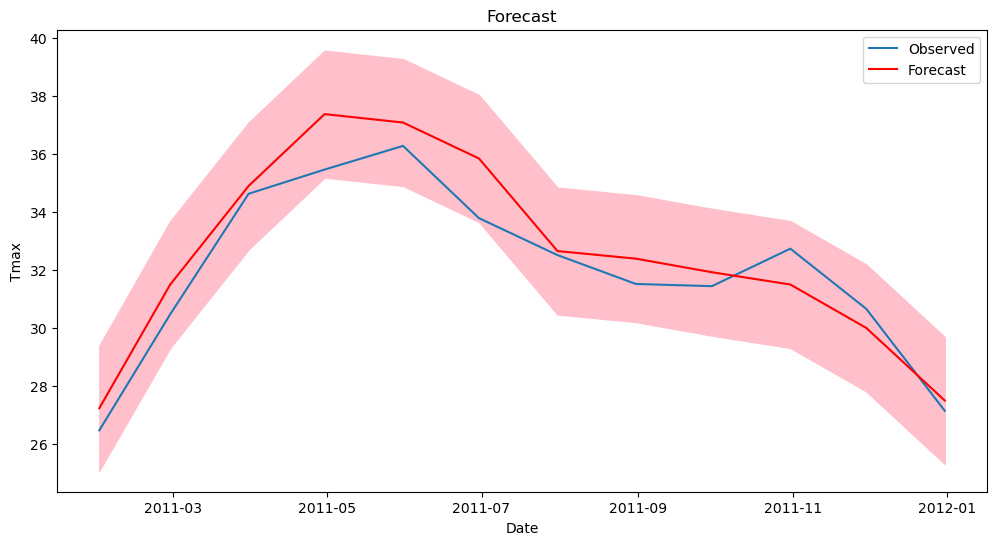

In [33]:
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(test_plot, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Forecast")
plt.xlabel("Date")
plt.ylabel("Tmax")
plt.legend()
plt.show()